In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import df
df1 = pd.read_csv('../data/imdb_top_1000.csv')   

In [69]:
df1.rang = df1.rang.str.replace('.','')
#from film remove the brackets and commas regex
df1.film = df1['film'].str.join(' ')
df1.jahr = df1.jahr.str[1:-1]
df1.dauer = df1.dauer.str.replace('min','')
#df1['jahr'] = pd.to_datetime(df1['jahr'], format='%Y')
df1.head()

C:\Users\David Dedic\AppData\Local\Temp\ipykernel_14616\3099403873.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1.rang = df1.rang.str.replace('.','')


,rang,film,jahr,fsk,dauer,genre,bewertung,regisseur,stars
0,1,"[ ' T h e ' , ' S h a w s h a n k ' , ' R ...",1994,R,142,Drama,9.3,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,2,"[ ' T h e ' , ' G o d f a t h e r ' ]",1972,16,175,"Crime, Drama",9.2,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,3,"[ ' T h e ' , ' D a r k ' , ' K n i g h t ' ]",2008,14,152,"Action, Crime, Drama",9.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,4,"[ "" S c h i n d l e r ' s "" , ' L i s t ' ]",1993,R,195,"Biography, Drama, History",9.0,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro..."
4,5,"[ ' T h e ' , ' L o r d ' , ' o f ' , ' ...",2003,PG-13,201,"Action, Adventure, Drama",9.0,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or..."


rang           0
film           0
jahr           0
fsk          581
dauer          0
genre          0
bewertung      0
regisseur      0
stars          0
dtype: int64


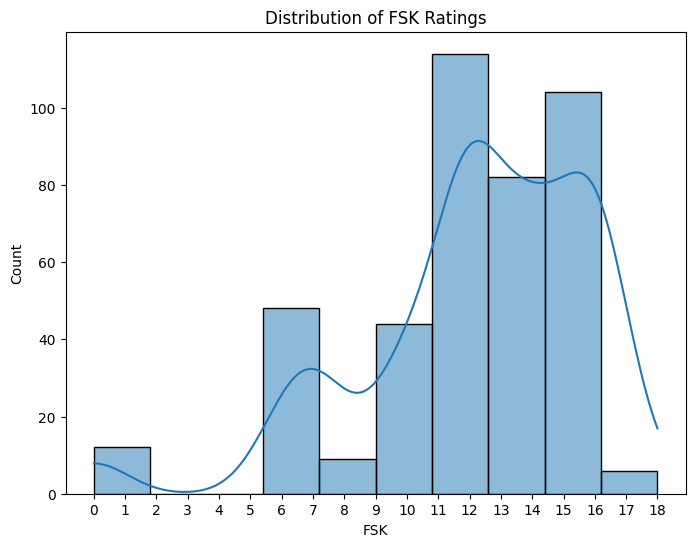

              fsk        dauer    bewertung
count  419.000000  1000.000000  1000.000000
mean    12.214797   124.243000     7.968400
std      3.669566    28.840071     0.274512
min      0.000000    45.000000     7.600000
25%     10.000000   103.000000     7.800000
50%     12.000000   120.000000     7.900000
75%     16.000000   138.250000     8.100000
max     18.000000   321.000000     9.300000


In [70]:
# convert dauer column to numeric
df1['dauer'] = pd.to_numeric(df1['dauer'], errors='coerce')
# Convert 'fsk' column to numeric (int) data type
df1['fsk'] = pd.to_numeric(df1['fsk'], errors='coerce')

# Check for missing values (NaN)
missing_values = df1.isnull().sum()
print(missing_values)

# Perform EDA
# Example: Plotting the distribution of 'fsk'
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='fsk', bins=10, kde=True)
plt.title('Distribution of FSK Ratings')
plt.xlabel('FSK')
plt.ylabel('Count')

# Set x-axis tick positions and labels
xticks = np.arange(0, df1['fsk'].max() + 1, 1)  # Adjust the step size if needed
plt.xticks(xticks)

plt.show()

# Print the summary statistics of numeric columns
print(df1.describe())


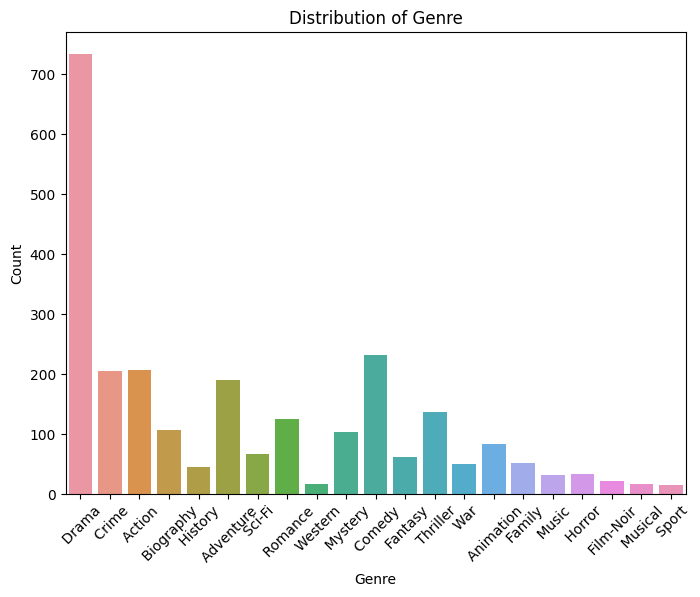

In [71]:
# long to wide on genre
df1['genre'] = df1['genre'].str.split(',')
df1 = df1.explode('genre')
# barplot of genre
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='genre')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


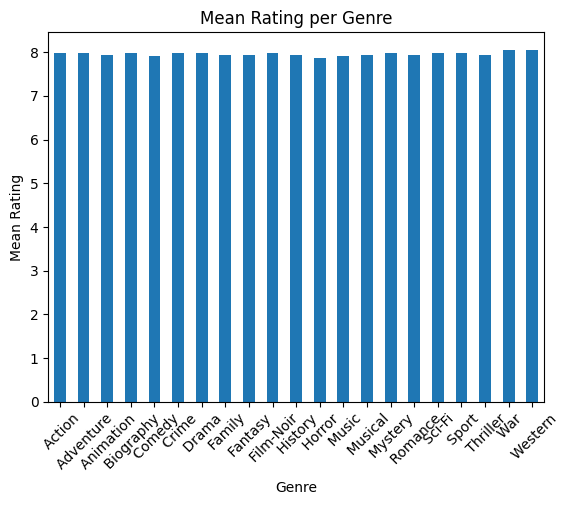

In [72]:
# count mean rating per gerne and plot
df1.groupby('genre')['bewertung'].mean().plot(kind='bar')
plt.title('Mean Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.show()

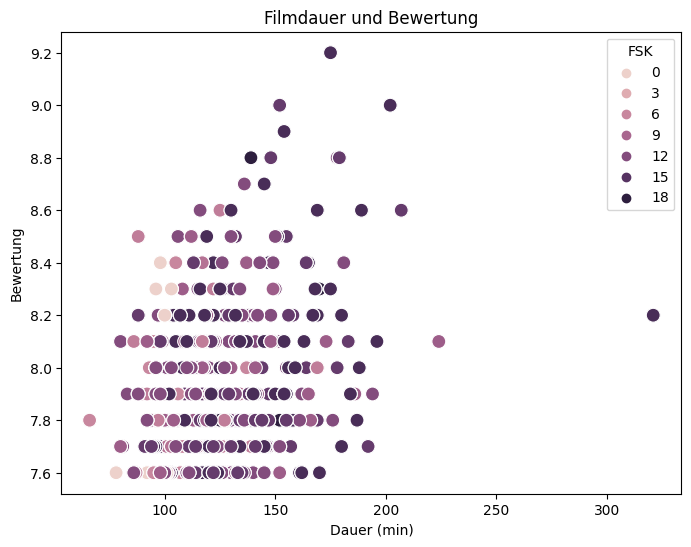

In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='dauer', y='bewertung', hue='fsk', s=100)
plt.title('Filmdauer und Bewertung')
plt.xlabel('Dauer (min)')
#better x ticks
xticks = np.arange(0, df1['dauer'].max() + 1, 10)  # Adjust the step size if needed

plt.ylabel('Bewertung')
plt.legend(title='FSK')
plt.show()


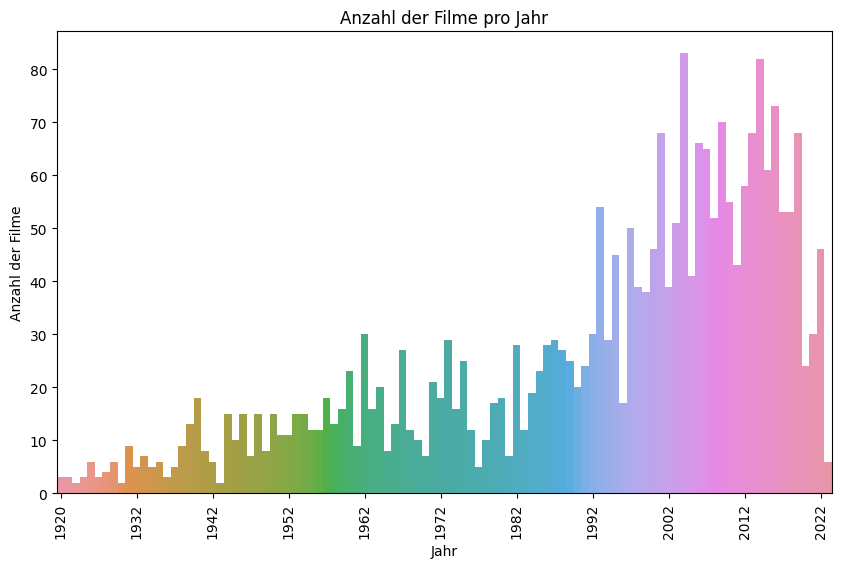

In [74]:
plt.figure(figsize=(10, 6))
film_count_by_year = df1['jahr'].value_counts().sort_index()
sns.barplot(x=film_count_by_year.index, y=film_count_by_year.values, width=1)
plt.title('Anzahl der Filme pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=90)
plt.xticks(range(0, len(film_count_by_year.index), 10), film_count_by_year.index[::10])
plt.show()

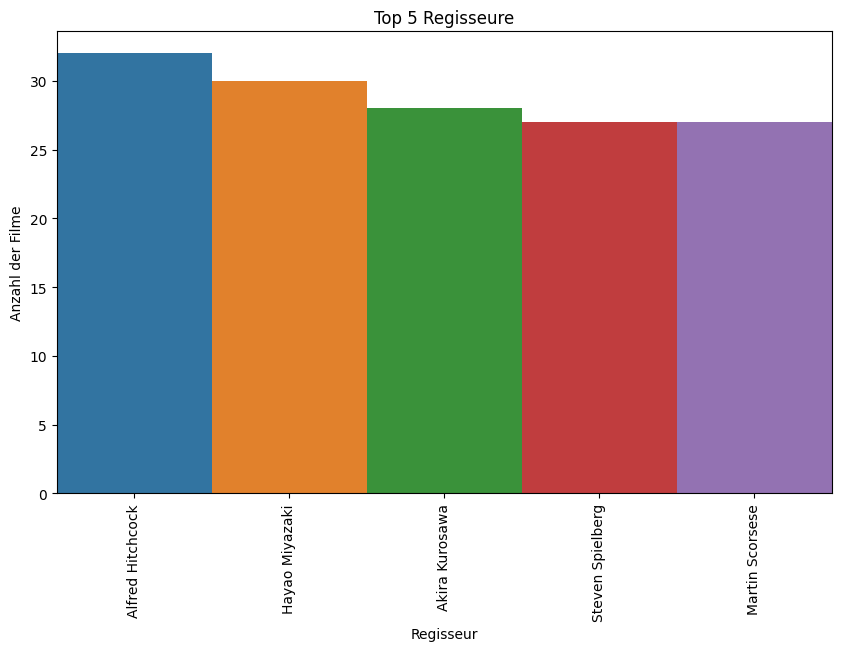

In [75]:
#plot top 5 regisseure
plt.figure(figsize=(10, 6))
reg_count = df1['regisseur'].value_counts().sort_values(ascending=False).head(5)
sns.barplot(x=reg_count.index, y=reg_count.values, width=1)
plt.title('Top 5 Regisseure')
plt.xlabel('Regisseur')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=90)
plt.show()

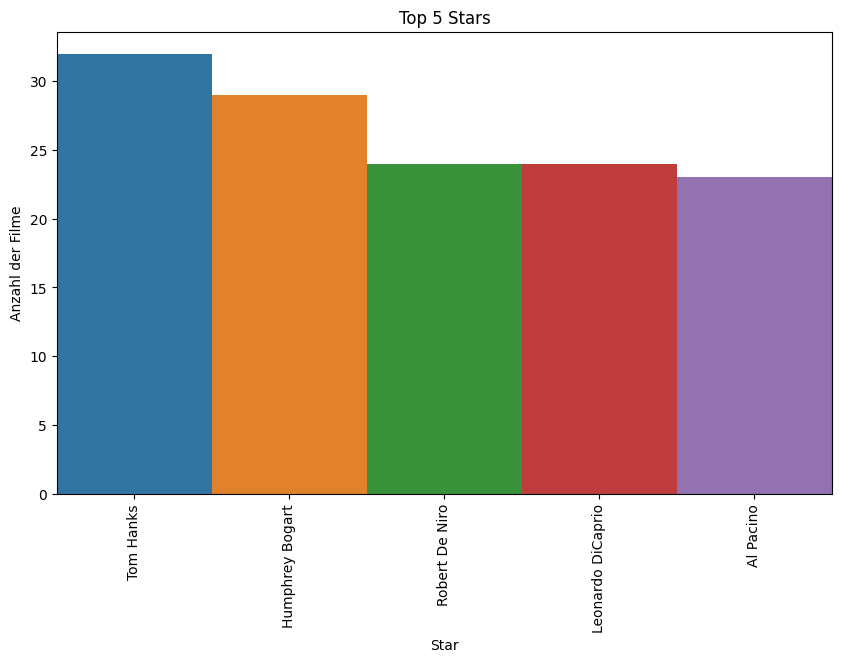

In [77]:
# long to wide on stars
df1['stars'] = df1['stars'].str.split(',')
df1 = df1.explode('stars')
# plot top 5 stars
plt.figure(figsize=(10, 6))
star_count = df1['stars'].value_counts().sort_values(ascending=False).head(5)
sns.barplot(x=star_count.index, y=star_count.values, width=1)
plt.title('Top 5 Stars')
plt.xlabel('Star')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=90)
plt.show()